In [1]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def quadratic_difference(img, obj):
    '''Calcula a diferença quadrática entre as imagens img e obj. É assumido que img é maior do 
       que obj. Portanto, a diferença é calculada para cada posição do centro da imagem obj ao 
       longo de img. Note que a função é facilmente modificável para processar imagens coloridas.'''
    
    num_rows, num_cols = img.shape
    num_rows_obj, num_cols_obj = obj.shape   

    half_num_rows_obj = num_rows_obj//2        # O operador // retorna a parte inteira da divisão
    half_num_cols_obj = num_cols_obj//2

    # Cria imagem com zeros ao redor da borda. Note que ao invés de adicionarmos 0, seria mais 
    # preciso calcularmos a diferença quadrática somente entre pixels contidos na imagem.
    img_padded = np.pad(img, ((half_num_rows_obj,half_num_rows_obj),
                             (half_num_cols_obj,half_num_cols_obj)), 
                             mode='reflect')
    
    img_diff = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            # patch é a região de img de mesmo tamanho que obj e centrada em (row, col)
            patch = img_padded[row:row+num_rows_obj, col:col+num_cols_obj]
            # Utilizando numpy, o comando abaixo calcula a diferença entre cada valor
            # dos arrays 2D patch e obj
            diff_region = (patch - obj)**2
            img_diff[row, col] = np.sum(diff_region)
            
    return img_diff

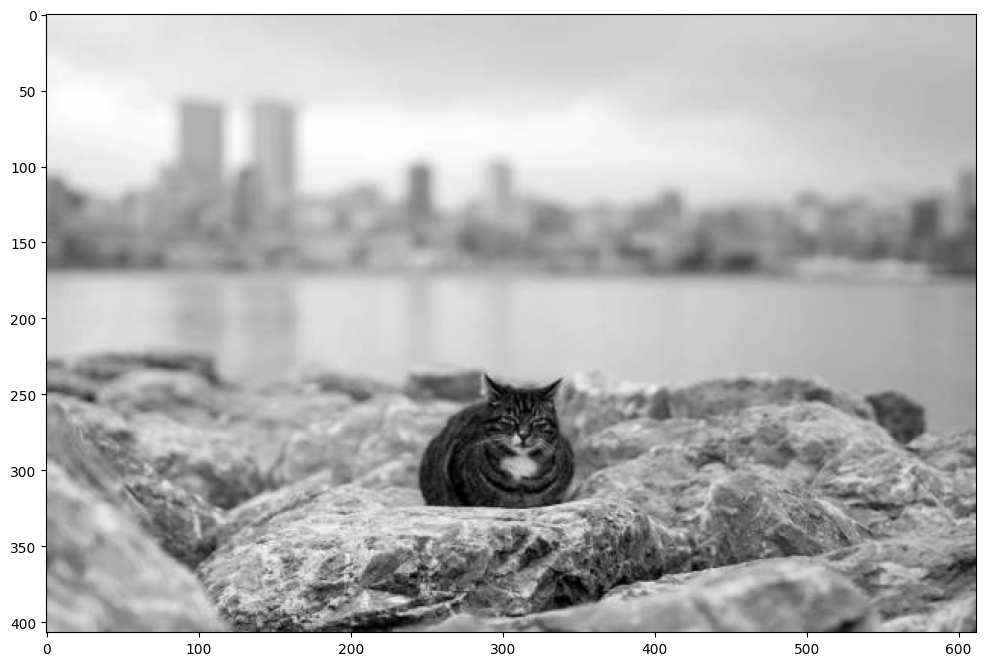

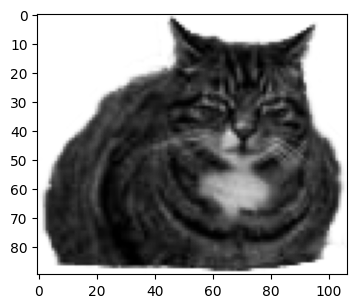

In [4]:
img_g = plt.imread('imagens/imagem_global.tiff')
img_g = img_g.astype(float)
img_o = plt.imread('imagens/gato.tiff')
img_o = img_o.astype(float)

plt.figure(figsize=[12,12])
plt.imshow(img_g, 'gray')
plt.figure(figsize=[4, 4])
plt.imshow(img_o, 'gray')

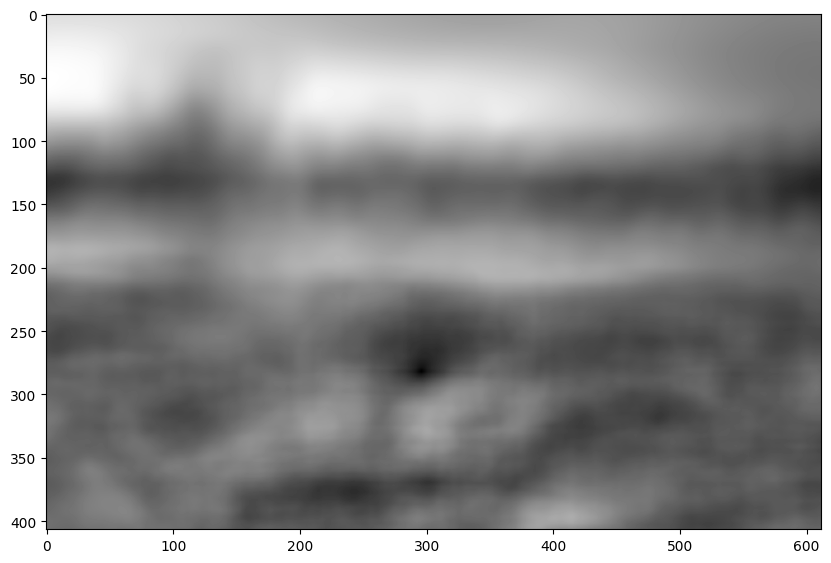

In [10]:
img_diff = quadratic_difference(img_g, img_o)
plt.figure(figsize=[10,10])
plt.imshow(img_diff, 'gray')

In [17]:
print(img_diff[300,300])

130373974.0


In [13]:
def find_minimum(img):
    '''Encontra posição do valor mínimo de img'''
    
    ind_min = np.argmin(img)     # Índice do menor valor considerando img como um array 1D
    row_min = ind_min//img.shape[1]
    col_min = ind_min - row_min*img.shape[1]
    index = (row_min, col_min)
    smallest_val = img[index]
    
    return smallest_val, index
            
smallest_val, index = find_minimum(img_diff)
print('Menor diferença: {}'.format(smallest_val))
print('Posição: {}'.format(index))

Menor diferença: 40844301.0
Posição: (282, 296)


### Mudando o gama, achar um valor menor que esse

In [18]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import cv2
def adjust_gamma(image, gamma):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [20]:
img_gama1, _ = adjust_gamma(img_o, 1)


error: OpenCV(4.7.0) /io/opencv/modules/core/src/lut.cpp:366: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'LUT'
